In [446]:
from importlib import reload
import three_split
from data import make_support
reload(three_split)
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [228]:
img = color.rgb2gray(io.imread('data/dali_guerra.jpg'))
s = np.linalg.svd(img, compute_uv=False)
#plt.plot(np.log(s), 'o-')

In [230]:
sample_rate = int(0.4*img.shape[0]*img.shape[1])
omega = make_support(img.shape, sample_rate)

In [232]:
(rec_img1, err_rate1), sec1 = three_split.three_split(img, omega, 0.3, 0.7, 0, 1, rank=100, accel=None, tol=1e-3)
(rec_img2, err_rate2), sec2 = three_split.three_split(img, omega, 0.3, 0.7, 0, 1, rank=100, accel='hb', damping=0.3, tol=1e-3)
(rec_img3, err_rate3), sec3 = three_split.three_split(img, omega, 0.3, 0.7, 0, 1, rank=100, accel='nest', damping=3, tol=1e-3)
(rec_img4, err_rate4), sec4 = three_split.my_three_split(img, omega, 0.3, 0.6, 0, 1, rank=100, accel=None, tol=1e-3)
(rec_img5, err_rate5), sec5 = three_split.my_three_split(img, omega, 0.3, 0.3, 0, 1, rank=100, accel='hb', damping=0.3, tol=1e-3)
(rec_img6, err_rate6), sec6 = three_split.my_three_split(img, omega, 0.3, 0.3, 0, 1, rank=100, accel='nest', damping=3, tol=1e-3)



In [233]:
print(err_rate1[-1], sec1)
print(err_rate2[-1], sec2)
print(err_rate3[-1], sec3)
print(err_rate4[-1], sec4)
print(err_rate5[-1], sec5)
print(err_rate6[-1], sec6)

0.08075278288865458 7.862573862075806
0.07836407907051392 2.406128168106079
0.07719081429424716 3.5899670124053955
0.08089156871072954 7.2721779346466064
0.08119955208485302 3.0678257942199707
0.07941088260415942 4.834984064102173


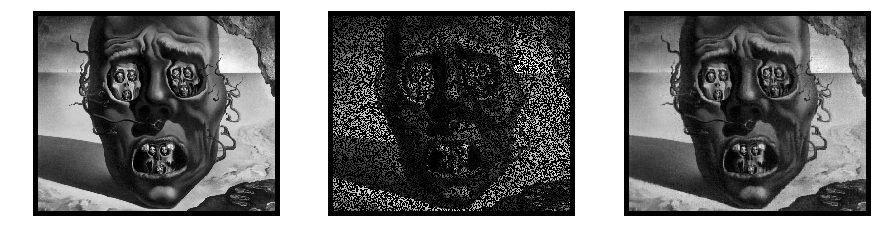

In [234]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(131)
ax.imshow(img, cmap='gray')
ax.axis('off')
ax=fig.add_subplot(132)
ax.imshow(omega*img, cmap='gray')
ax.axis('off')
ax=fig.add_subplot(133)
ax.imshow(rec_img2, cmap='gray')
ax.axis('off')
plt.show()

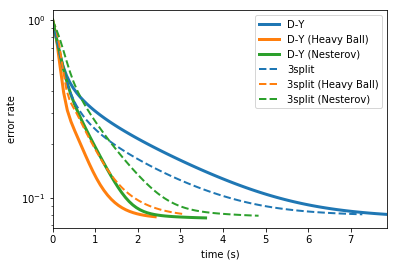

In [235]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_yscale("log")
p1=ax.plot(np.linspace(0,sec1,len(err_rate1)), err_rate1, linewidth=3, label='D-Y')
p2=ax.plot(np.linspace(0,sec2,len(err_rate2)), err_rate2, linewidth=3, label='D-Y (Heavy Ball)')
p3=ax.plot(np.linspace(0,sec3,len(err_rate3)), err_rate3, linewidth=3, label='D-Y (Nesterov)')
ax.plot(np.linspace(0,sec4,len(err_rate4)), err_rate4, color=p1[0].get_color(), linestyle='--', linewidth=2, label='3split')
ax.plot(np.linspace(0,sec5,len(err_rate5)), err_rate5, color=p2[0].get_color(), linestyle='--', linewidth=2, label='3split (Heavy Ball)')
ax.plot(np.linspace(0,sec6,len(err_rate6)), err_rate6, color=p3[0].get_color(), linestyle='--', linewidth=2, label='3split (Nesterov)')
ax.legend(loc=0)
ax.set_xlabel(r'time (s)')
ax.set_ylabel(r'error rate')
ax.set_xlim([0,sec1])
#ax.set_ylim([3.5e-2,1])
plt.show()

In [353]:
img = color.rgb2gray(io.imread('data/dali.jpg'))
s = np.linalg.svd(img, compute_uv=False)
#plt.plot(np.log(s), 'o-')

In [354]:
sample_rate = int(0.4*img.shape[0]*img.shape[1])
omega = make_support(img.shape, sample_rate)

In [355]:
(rec_img1, err_rate1), sec1 = three_split.three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel=None, tol=1e-3)
(rec_img2, err_rate2), sec2 = three_split.three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel='hb', damping=0.5, tol=1e-3)
(rec_img3, err_rate3), sec3 = three_split.three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel='nest', damping=3, tol=1e-3)
(rec_img4, err_rate4), sec4 = three_split.my_three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel=None, tol=1e-3)
(rec_img5, err_rate5), sec5 = three_split.my_three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel='hb', damping=0.5, tol=1e-3)
(rec_img6, err_rate6), sec6 = three_split.my_three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel='nest', damping=3, tol=1e-3)



In [356]:
print(err_rate1[-1], sec1)
print(err_rate2[-1], sec2)
print(err_rate3[-1], sec3)
print(err_rate4[-1], sec4)
print(err_rate5[-1], sec5)
print(err_rate6[-1], sec6)

0.04357220476264469 12.333460092544556
0.04288328477678951 4.370610952377319
0.042080600602612976 5.944565057754517
0.038445092241500875 7.946117877960205
0.03837672333406296 4.0613486766815186
0.03830811220730869 6.790750980377197


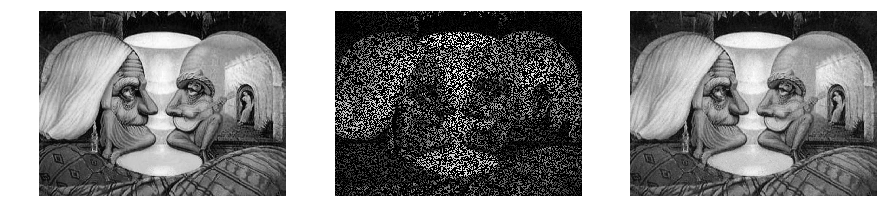

In [358]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(131)
ax.imshow(img, cmap='gray')
ax.axis('off')
ax=fig.add_subplot(132)
ax.imshow(omega*img, cmap='gray')
ax.axis('off')
ax=fig.add_subplot(133)
ax.imshow(rec_img6, cmap='gray')
ax.axis('off')
plt.show()

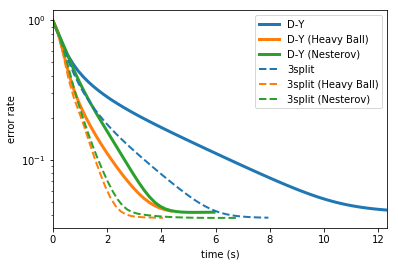

In [360]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_yscale("log")
p1=ax.plot(np.linspace(0,sec1,len(err_rate1)), err_rate1, linewidth=3, label='D-Y')
p2=ax.plot(np.linspace(0,sec2,len(err_rate2)), err_rate2, linewidth=3, label='D-Y (Heavy Ball)')
p3=ax.plot(np.linspace(0,sec3,len(err_rate3)), err_rate3, linewidth=3, label='D-Y (Nesterov)')
ax.plot(np.linspace(0,sec4,len(err_rate4)), err_rate4, color=p1[0].get_color(), linestyle='--', linewidth=2, label='3split')
ax.plot(np.linspace(0,sec5,len(err_rate5)), err_rate5, color=p2[0].get_color(), linestyle='--', linewidth=2, label='3split (Heavy Ball)')
ax.plot(np.linspace(0,sec6,len(err_rate6)), err_rate6, color=p3[0].get_color(), linestyle='--', linewidth=2, label='3split (Nesterov)')
ax.legend(loc=0)
ax.set_xlabel(r'time (s)')
ax.set_ylabel(r'error rate')
ax.set_xlim([0,sec1])
#ax.set_ylim([3.5e-2,1])
plt.show()


In [303]:
img = color.rgb2gray(io.imread('data/van_gogh2.jpg'))
s = np.linalg.svd(img, compute_uv=False)
#plt.plot(np.log(s), 'o-')

In [313]:
sample_rate = int(0.4*img.shape[0]*img.shape[1])
omega = make_support(img.shape, sample_rate)
print(img.shape)

(1110, 1500)


In [348]:
(rec_img1, err_rate1), sec1 = three_split.three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel=None, tol=1e-3)
(rec_img2, err_rate2), sec2 = three_split.three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel='hb', damping=0.5, tol=1e-3)
(rec_img3, err_rate3), sec3 = three_split.three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel='nest', damping=3, tol=2e-3)
(rec_img4, err_rate4), sec4 = three_split.my_three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel=None, tol=1e-3)
(rec_img5, err_rate5), sec5 = three_split.my_three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel='hb', damping=0.5, tol=1e-3)
(rec_img6, err_rate6), sec6 = three_split.my_three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel='nest', damping=3, tol=5e-3)


In [349]:
print(err_rate1[-1], sec1)
print(err_rate2[-1], sec2)
print(err_rate3[-1], sec3)
print(err_rate4[-1], sec4)
print(err_rate5[-1], sec5)
print(err_rate6[-1], sec6)

0.08716372385383182 10.700415849685669
0.08707880164568536 4.585923910140991
0.08672402379980577 5.3707780838012695
0.0888159266493504 7.427995920181274
0.08898408154754432 4.33132529258728
0.08995719663983594 4.287732839584351


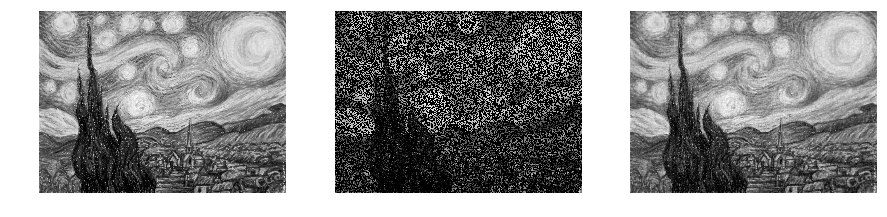

In [351]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(131)
ax.imshow(img, cmap='gray')
ax.axis('off')
ax=fig.add_subplot(132)
ax.imshow(omega*img, cmap='gray')
ax.axis('off')
ax=fig.add_subplot(133)
ax.imshow(rec_img2, cmap='gray')
ax.axis('off')
plt.show()

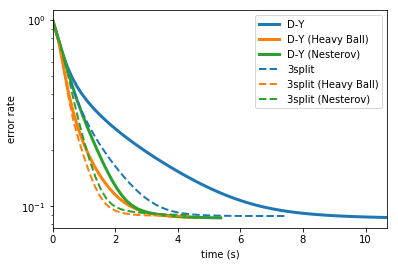

In [352]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_yscale("log")
p1=ax.plot(np.linspace(0,sec1,len(err_rate1)), err_rate1, linewidth=3, label='D-Y')
p2=ax.plot(np.linspace(0,sec2,len(err_rate2)), err_rate2, linewidth=3, label='D-Y (Heavy Ball)')
p3=ax.plot(np.linspace(0,sec3,len(err_rate3)), err_rate3, linewidth=3, label='D-Y (Nesterov)')
ax.plot(np.linspace(0,sec4,len(err_rate4)), err_rate4, color=p1[0].get_color(), linestyle='--', linewidth=2, label='3split')
ax.plot(np.linspace(0,sec5,len(err_rate5)), err_rate5, color=p2[0].get_color(), linestyle='--', linewidth=2, label='3split (Heavy Ball)')
ax.plot(np.linspace(0,sec6,len(err_rate6)), err_rate6, color=p3[0].get_color(), linestyle='--', linewidth=2, label='3split (Nesterov)')
ax.legend(loc=0)
ax.set_xlabel(r'time (s)')
ax.set_ylabel(r'error rate')
ax.set_xlim([0,sec1])
#ax.set_ylim([3.5e-2,1])
plt.show()

In [441]:
img = color.rgb2gray(io.imread('data/jaqueline.jpg'))
sample_rate = int(0.4*img.shape[0]*img.shape[1])
omega = make_support(img.shape, sample_rate)
print(img.shape)

(1536, 1262)


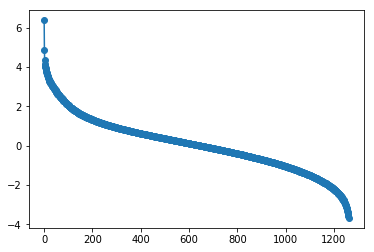

In [424]:
plt.plot(np.log(np.linalg.svd(img, compute_uv=False)), '-o')

In [448]:
(rec_img1, err_rate1), sec1 = three_split.three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel=None, tol=1e-3)
#(rec_img2, err_rate2), sec2 = three_split.three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel='hb', damping=0.5, tol=1e-3)
#(rec_img3, err_rate3), sec3 = three_split.three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel='nest', damping=3, tol=2e-3)
#(rec_img4, err_rate4), sec4 = three_split.my_three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel=None, tol=1e-3)
#(rec_img5, err_rate5), sec5 = three_split.my_three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel='hb', damping=0.5, tol=1e-3)
#(rec_img6, err_rate6), sec6 = three_split.my_three_split(img, omega, 0.5, 0.6, 0, 1, rank=100, accel='nest', damping=3, tol=5e-3)


In [449]:
print(err_rate1[-1], sec1)
#print(err_rate2[-1], sec2)
#print(err_rate3[-1], sec3)
#print(err_rate4[-1], sec4)
#print(err_rate5[-1], sec5)
#print(err_rate6[-1], sec6)

0.12196900660182743 12.471201658248901


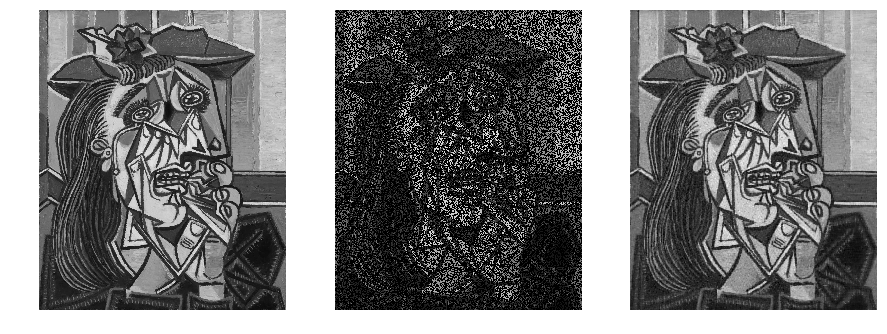

In [375]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(131)
ax.imshow(img, cmap='gray')
ax.axis('off')
ax=fig.add_subplot(132)
ax.imshow(omega*img, cmap='gray')
ax.axis('off')
ax=fig.add_subplot(133)
ax.imshow(rec_img2, cmap='gray')
ax.axis('off')
plt.show()

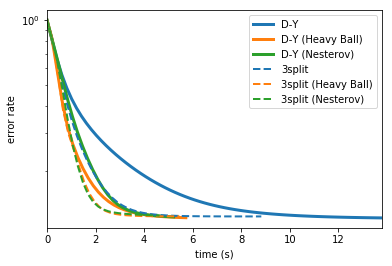

In [376]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_yscale("log")
p1=ax.plot(np.linspace(0,sec1,len(err_rate1)), err_rate1, linewidth=3, label='D-Y')
p2=ax.plot(np.linspace(0,sec2,len(err_rate2)), err_rate2, linewidth=3, label='D-Y (Heavy Ball)')
p3=ax.plot(np.linspace(0,sec3,len(err_rate3)), err_rate3, linewidth=3, label='D-Y (Nesterov)')
ax.plot(np.linspace(0,sec4,len(err_rate4)), err_rate4, color=p1[0].get_color(), linestyle='--', linewidth=2, label='3split')
ax.plot(np.linspace(0,sec5,len(err_rate5)), err_rate5, color=p2[0].get_color(), linestyle='--', linewidth=2, label='3split (Heavy Ball)')
ax.plot(np.linspace(0,sec6,len(err_rate6)), err_rate6, color=p3[0].get_color(), linestyle='--', linewidth=2, label='3split (Nesterov)')
ax.legend(loc=0)
ax.set_xlabel(r'time (s)')
ax.set_ylabel(r'error rate')
ax.set_xlim([0,sec1])
#ax.set_ylim([3.5e-2,1])
plt.show()